<a href="https://colab.research.google.com/github/simeminoski87/Data-Science/blob/main/Copy_of_Aud3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from datetime import date
from datetime import datetime
import requests
from bs4 import BeautifulSoup
from IPython import html
requests.packages.urllib3.disable_warnings()
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.10/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [ ]:
snapshot_url='https://www.cnbc.com/finance/'
snapshot=requests.get(snapshot_url)
soup=BeautifulSoup(snapshot.text,'html.parser')
card_titles = soup.select('.Card-title')
card_times = soup.select('.Card-time')
card_classes = soup.select('.Card-eyebrow')

In [ ]:
card_titles[0].text

'Stocks making the biggest moves premarket: Rigetti Computing, KULR Technology, MicroStrategy and more'

In [ ]:
def get_data(url):
  snapshot_url=url
  snapshot=requests.get(snapshot_url)
  soup=BeautifulSoup(snapshot.text,'html.parser')
  card_titles = soup.select('.Card-title')
  card_times = soup.select('.Card-time')
  card_classes = soup.select('.Card-eyebrow')
  titles=[]
  times=[]
  classes=[]
  matrix=[]
  class_news=url.split("/")[-2]
  for i in range(0,len(card_titles)):
    time=card_times[i].text
    d = time.split(" ")
    date_list=[]
    if 'sec' in time or 'min' in time or 'hour' in time:
      today=date.today()
      date_list=[today.day,today.month]
    else:
      date_list=[int(d[2][:-2]),datetime.strptime(d[1],'%b').month]
    redica=[card_titles[i].text,card_times[i].text,date_list[0],date_list[1]]
    if i<5:
      redica.append('Top news '+ class_news)
    else:
      redica.append(card_classes[i-5].text)
    matrix.append(redica)
  df=pd.DataFrame(np.array(matrix),columns=['Title','Date','Day','Month','Class'])
  return df



In [ ]:
df_finance=get_data(snapshot_url)
df_finance

,Title,Date,Day,Month,Class
0,Stocks making the biggest moves premarket: Rig...,38 min ago,27,12,Top news finance
1,10-year Treasury yield back above 4.6% to end ...,11 min ago,27,12,Top news finance
2,Treasury delays deadline for small businesses ...,"Thu, Dec 26th 2024",26,12,Top news finance
3,Stocks making the biggest moves midday: Broadc...,"Thu, Dec 26th 2024",26,12,Top news finance
4,Stocks making biggest moves premarket: GameSto...,"Thu, Dec 26th 2024",26,12,Top news finance
5,93% of 401(k)s offer Roth contributions – but ...,"Thu, Dec 26th 2024",26,12,Personal Finance
6,Treasury yields are flat as investors digest j...,"Thu, Dec 26th 2024",26,12,Markets
7,Stocks making big moves midday: American Airli...,"Tue, Dec 24th 2024",24,12,Market Insider
8,Biggest banks sue the Federal Reserve over ann...,"Tue, Dec 24th 2024",24,12,Banks
9,Why the 'great resignation' became the 'great ...,"Mon, Dec 23rd 2024",23,12,Personal Finance


In [ ]:
df_health=get_data('https://www.cnbc.com/health-and-science/')
df_health

,Title,Date,Day,Month,Class
0,Danaher had a disappointing 2024. Its path to ...,"Thu, Dec 26th 2024",26,12,Top news health-and-science
1,Recalled Costco eggs may cause severe illness ...,4 hours ago,27,12,Top news health-and-science
2,Digital health stocks got hammered by Wall Str...,"Tue, Dec 24th 2024",24,12,Top news health-and-science
3,FDA says Zepbound shortage is over. What that ...,"Tue, Dec 24th 2024",24,12,Top news health-and-science
4,The 'weight loss trade' has stalled. What it w...,"Mon, Dec 23rd 2024",23,12,Top news health-and-science
5,Eli Lilly looks to extend its winning streak o...,"Mon, Dec 23rd 2024",23,12,Analysis
6,FDA approves Eli Lilly's weight loss drug Zepb...,"Fri, Dec 20th 2024",20,12,Health and Science
7,FDA says Eli Lilly's weight loss drug Zepbound...,"Thu, Dec 19th 2024",19,12,Health and Science
8,Why Americans are outraged over health insuran...,"Thu, Dec 19th 2024",19,12,Health and Science
9,Merck to develop weight loss pill from Chinese...,"Wed, Dec 18th 2024",18,12,Health and Science


In [ ]:
df_finance.to_csv('/content/drive/MyDrive/Colab Notebooks/dataFrameFinance',index=False)

In [ ]:
df_health.to_csv('/content/drive/MyDrive/Colab Notebooks/dataFrameHelath',index=False)

In [ ]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   34 non-null     object
 1   Date    34 non-null     object
 2   Day     34 non-null     object
 3   Month   34 non-null     object
 4   Class   34 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


In [ ]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   34 non-null     object
 1   Date    34 non-null     object
 2   Day     34 non-null     object
 3   Month   34 non-null     object
 4   Class   34 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


In [ ]:
df_finance.head()


,Title,Date,Day,Month,Class
0,Stocks making the biggest moves premarket: Rig...,38 min ago,27,12,Top news finance
1,10-year Treasury yield back above 4.6% to end ...,11 min ago,27,12,Top news finance
2,Treasury delays deadline for small businesses ...,"Thu, Dec 26th 2024",26,12,Top news finance
3,Stocks making the biggest moves midday: Broadc...,"Thu, Dec 26th 2024",26,12,Top news finance
4,Stocks making biggest moves premarket: GameSto...,"Thu, Dec 26th 2024",26,12,Top news finance


In [ ]:
df_top_news = pd.concat([df_finance[df_finance['Class'] == 'Top news finance'],
                         df_health[df_health['Class'] == 'Top news health-and-science']])
df_top_news


,Title,Date,Day,Month,Class
0,Stocks making the biggest moves premarket: Rig...,38 min ago,27,12,Top news finance
1,10-year Treasury yield back above 4.6% to end ...,11 min ago,27,12,Top news finance
2,Treasury delays deadline for small businesses ...,"Thu, Dec 26th 2024",26,12,Top news finance
3,Stocks making the biggest moves midday: Broadc...,"Thu, Dec 26th 2024",26,12,Top news finance
4,Stocks making biggest moves premarket: GameSto...,"Thu, Dec 26th 2024",26,12,Top news finance
0,Danaher had a disappointing 2024. Its path to ...,"Thu, Dec 26th 2024",26,12,Top news health-and-science
1,Recalled Costco eggs may cause severe illness ...,4 hours ago,27,12,Top news health-and-science
2,Digital health stocks got hammered by Wall Str...,"Tue, Dec 24th 2024",24,12,Top news health-and-science
3,FDA says Zepbound shortage is over. What that ...,"Tue, Dec 24th 2024",24,12,Top news health-and-science
4,The 'weight loss trade' has stalled. What it w...,"Mon, Dec 23rd 2024",23,12,Top news health-and-science


In [ ]:
df_top_news.sort_values('Day')

,Title,Date,Day,Month,Class
4,The 'weight loss trade' has stalled. What it w...,"Mon, Dec 23rd 2024",23,12,Top news health-and-science
2,Digital health stocks got hammered by Wall Str...,"Tue, Dec 24th 2024",24,12,Top news health-and-science
3,FDA says Zepbound shortage is over. What that ...,"Tue, Dec 24th 2024",24,12,Top news health-and-science
2,Treasury delays deadline for small businesses ...,"Thu, Dec 26th 2024",26,12,Top news finance
3,Stocks making the biggest moves midday: Broadc...,"Thu, Dec 26th 2024",26,12,Top news finance
4,Stocks making biggest moves premarket: GameSto...,"Thu, Dec 26th 2024",26,12,Top news finance
0,Danaher had a disappointing 2024. Its path to ...,"Thu, Dec 26th 2024",26,12,Top news health-and-science
0,Stocks making the biggest moves premarket: Rig...,38 min ago,27,12,Top news finance
1,10-year Treasury yield back above 4.6% to end ...,11 min ago,27,12,Top news finance
1,Recalled Costco eggs may cause severe illness ...,4 hours ago,27,12,Top news health-and-science


In [ ]:

df=pd.concat([df_finance,df_health])
df

,Title,Date,Day,Month,Class
0,Stocks making the biggest moves premarket: Rig...,38 min ago,27,12,Top news finance
1,10-year Treasury yield back above 4.6% to end ...,11 min ago,27,12,Top news finance
2,Treasury delays deadline for small businesses ...,"Thu, Dec 26th 2024",26,12,Top news finance
3,Stocks making the biggest moves midday: Broadc...,"Thu, Dec 26th 2024",26,12,Top news finance
4,Stocks making biggest moves premarket: GameSto...,"Thu, Dec 26th 2024",26,12,Top news finance
...,...,...,...,...,...
29,UnitedHealthcare CEO Brian Thompson fatally sh...,"Thu, Dec 5th 2024",5,12,Health and Science
30,Zepbound causes greater weight loss than Wegov...,"Wed, Dec 4th 2024",4,12,Health and Science
31,Mike Bloomberg warns making RFK Jr. HHS secret...,"Tue, Dec 3rd 2024",3,12,Politics
32,CDC says McDonald's E. coli outbreak is over,"Tue, Dec 3rd 2024",3,12,Health and Science


In [ ]:
df_health=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataFrameHelath.csv')
df_health['Day'].median()

11.5

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/mergedData.csv')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mergedData.csv')

In [ ]:
df.max()

,0
Unnamed: 0,33
Title,Zepbound causes greater weight loss than Wegov...
Date,"Wed, Dec 4th 2024"
Day,27
Month,12
Class,Trade Alerts


In [ ]:
print(f"std day:{df['Day'].std()}")
print(f"std month:{df['Month'].std()}")
print(f"mean month:{df['Month'].mean()}")
print(f"quantile day:{df['Day'].quantile([.25,.5,.75])}")

std day:7.015472677732452
std month:0.1212678125181665
mean month:11.985294117647058
quantile day:0.25    11.75
0.50    19.00
0.75    23.00
Name: Day, dtype: float64


In [ ]:
from scipy import stats
stats.gmean(df.iloc[:,3:5],axis=0)

array([15.25431835, 11.98465487])

In [ ]:
df.iloc[:,3:5]

,Day,Month
0,27,12
1,27,12
2,26,12
3,26,12
4,26,12
...,...,...
63,5,12
64,4,12
65,3,12
66,3,12


In [ ]:
df.Class.value_counts()

,count
Class,
Health and Science,14
Market Insider,11
Top news finance,5
Top news health-and-science,5
Markets,4
Healthy Returns,4
Federal Reserve,3
Trade Alerts,3
Personal Finance,3


In [ ]:
%matplotlib inline

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Top news finance'),
  Text(1, 0, 'Personal Finance'),
  Text(2, 0, 'Markets'),
  Text(3, 0, 'Market Insider'),
  Text(4, 0, 'Banks'),
  Text(5, 0, 'ETF Edge'),
  Text(6, 0, 'Federal Reserve'),
  Text(7, 0, 'Finance'),
  Text(8, 0, 'China Economy'),
  Text(9, 0, 'Trade Alerts'),
  Text(10, 0, 'ETF Strategist'),
  Text(11, 0, 'Top news health-and-science'),
  Text(12, 0, 'Analysis'),
  Text(13, 0, 'Health and Science'),
  Text(14, 0, 'Tech'),
  Text(15, 0, 'Healthy Returns'),
  Text(16, 0, 'Homestretch'),
  Text(17, 0, 'Cyber Report'),
  Text(18, 0, 'Politics'),
  Text(19, 0, 'Health Insurance')])

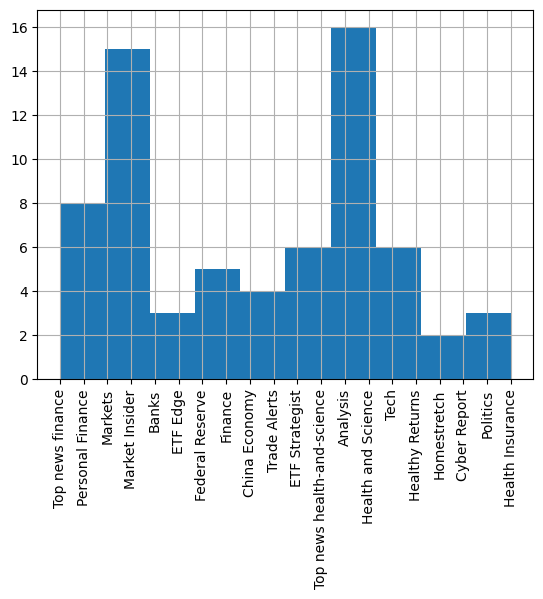

In [ ]:
df['Class'].hist()
plt.xticks(rotation=90)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'Month'}>, <Axes: >]], dtype=object)

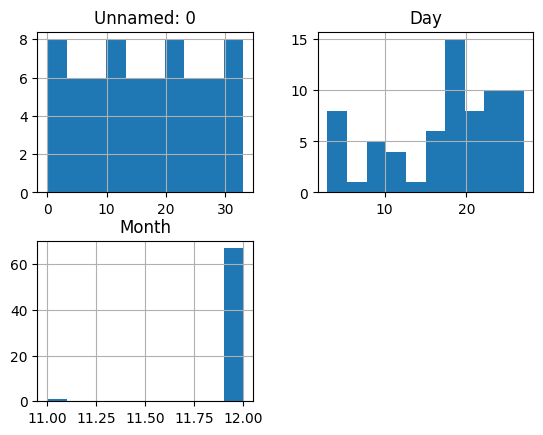

In [ ]:
df.hist(bins=10)

<Axes: >

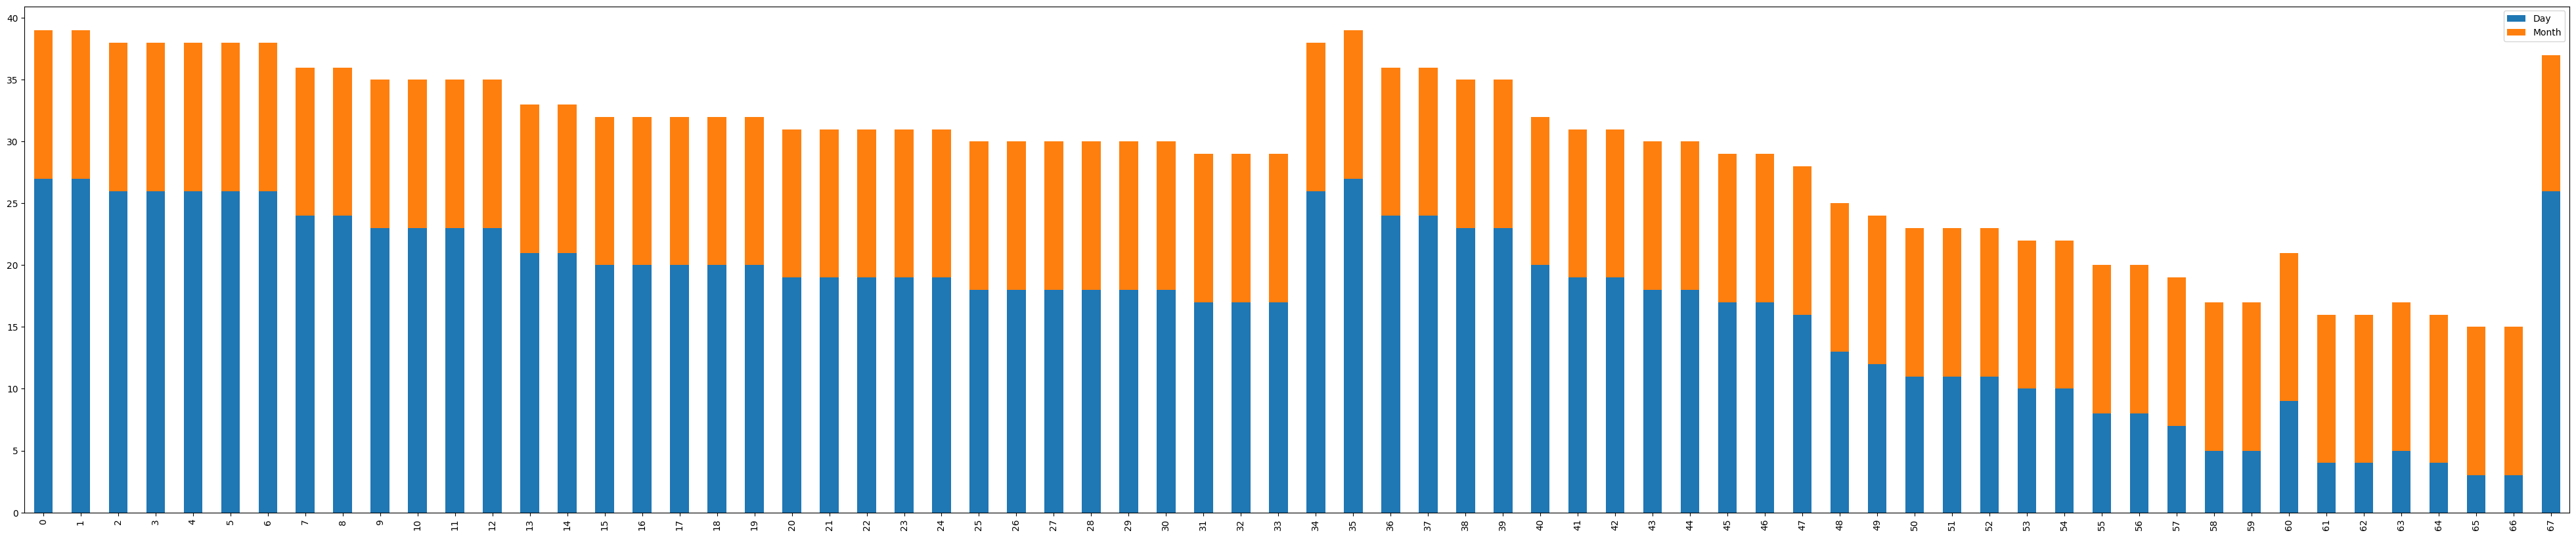

In [ ]:
df[['Day','Month']].plot.bar(stacked=True,figsize=(50,10))

<Axes: >

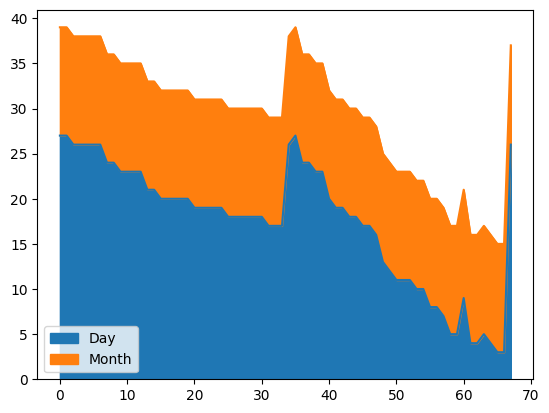

In [ ]:
df[['Day','Month']].plot.area()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Top news finance'),
  Text(1, 0, 'Personal Finance'),
  Text(2, 0, 'Markets'),
  Text(3, 0, 'Market Insider'),
  Text(4, 0, 'Banks'),
  Text(5, 0, 'ETF Edge'),
  Text(6, 0, 'Federal Reserve'),
  Text(7, 0, 'Finance'),
  Text(8, 0, 'China Economy'),
  Text(9, 0, 'Trade Alerts'),
  Text(10, 0, 'ETF Strategist'),
  Text(11, 0, 'Top news health-and-science'),
  Text(12, 0, 'Analysis'),
  Text(13, 0, 'Health and Science'),
  Text(14, 0, 'Tech'),
  Text(15, 0, 'Healthy Returns'),
  Text(16, 0, 'Homestretch'),
  Text(17, 0, 'Cyber Report'),
  Text(18, 0, 'Politics'),
  Text(19, 0, 'Health Insurance')])

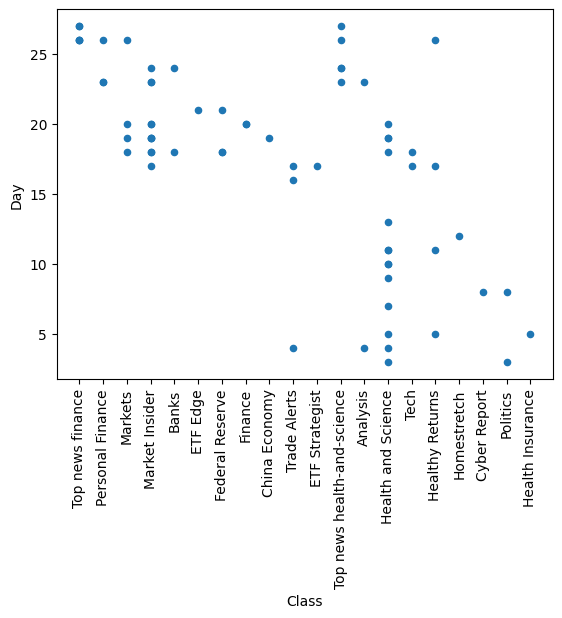

In [ ]:
df.plot.scatter(x='Class',y='Day')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Analysis'),
  Text(1, 0, 'Banks'),
  Text(2, 0, 'China Economy'),
  Text(3, 0, 'Cyber Report'),
  Text(4, 0, 'ETF Edge'),
  Text(5, 0, 'ETF Strategist'),
  Text(6, 0, 'Federal Reserve'),
  Text(7, 0, 'Finance'),
  Text(8, 0, 'Health Insurance'),
  Text(9, 0, 'Health and Science'),
  Text(10, 0, 'Healthy Returns'),
  Text(11, 0, 'Homestretch'),
  Text(12, 0, 'Market Insider'),
  Text(13, 0, 'Markets'),
  Text(14, 0, 'Personal Finance'),
  Text(15, 0, 'Politics'),
  Text(16, 0, 'Tech'),
  Text(17, 0, 'Top news finance'),
  Text(18, 0, 'Top news health-and-science'),
  Text(19, 0, 'Trade Alerts')])

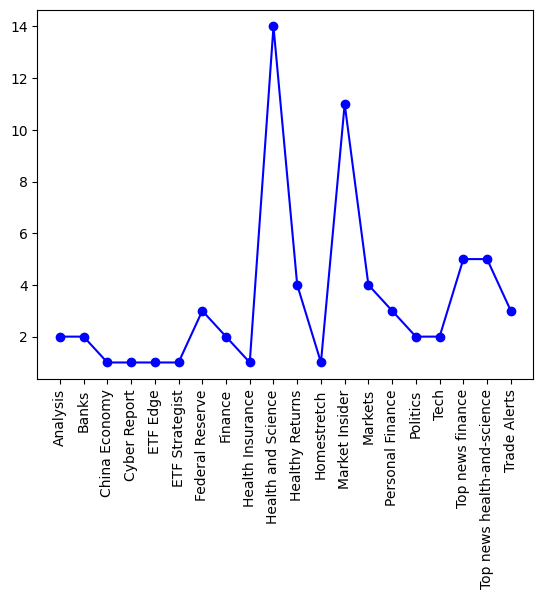

In [ ]:

plt.plot(df.groupby('Class').count().Day,'-ob')
plt.xticks(rotation=90)


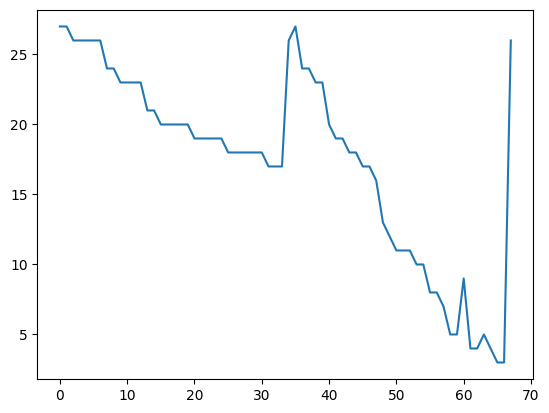

In [ ]:
plt.plot(df['Day'])

In [ ]:
import seaborn as sns

<Axes: xlabel='Day', ylabel='Density'>

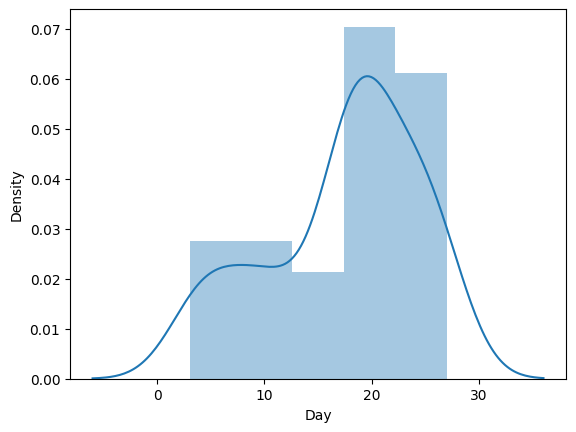

In [ ]:
sns.distplot(df['Day'],bins=5,label='Day',kde=True)

<Axes: >

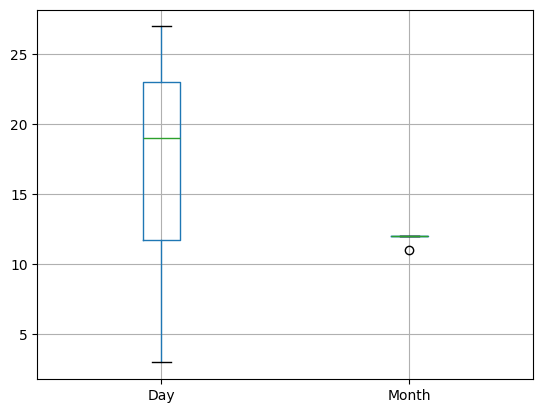

In [ ]:
df.boxplot(column=['Day','Month'])